# Image Classification of CIFAR10 using PennyLane

## Quanvolutional Neural Networks

In this demo we implement the *Quanvolutional Neural Network*, a quantum
machine learning model originally introduced in
Henderson et al. (2019) <https://arxiv.org/abs/1904.04767>.

This is the tutorial given on PennyLane's website. Following is the URL of the same.

URL: https://pennylane.ai/qml/demos/tutorial_quanvolution.html#loading-of-the-mnist-dataset

## The CIFAR-10 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The data is a part of Keras library and we are going to download it from it.

Here are the classes in the dataset, as well as 10 random images from each: 

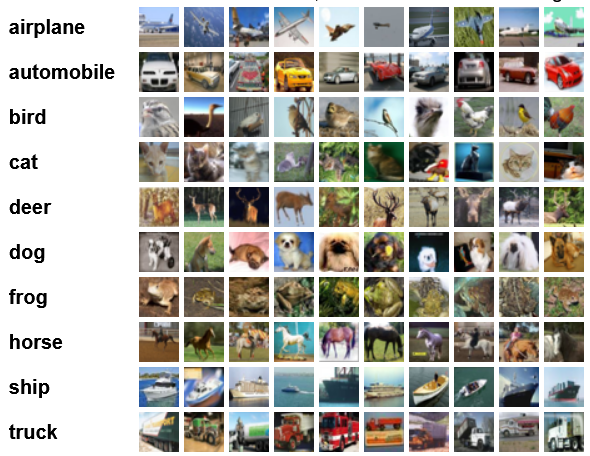

# Quantum convolution

One can extend the same idea also to the context of quantum variational circuits. A possible approach is given by the following procedure which is very similar to the one used in Ref. [1]. The scheme is also represented in the figure at the top of this tutorial.

1. A small region of the input image, in our example a 2×2 square, is embedded into a quantum circuit. In this demo, this is achieved with parametrized rotations applied to the qubits initialized in the ground state.
2. A quantum computation, associated to a unitary U, is performed on the system. The unitary could be generated by a variational quantum circuit or, more simply, by a random circuit as proposed in Ref. [1].
3. The quantum system is finally measured, obtaining a list of classical expectation values. The measurement results could also be classically post-processed as proposed in Ref. [1] but, for simplicity, in this demo we directly use the raw expectation values.
4. Analogously to a classical convolution layer, each expectation value is mapped to a different channel of a single output pixel.
5. Iterating the same procedure over different regions, one can scan the full input image, producing an output object which will be structured as a multi-channel image.
6. The quantum convolution can be followed by further quantum layers or by classical layers.

The main difference with respect to a classical convolution is that a quantum circuit can generate highly complex kernels whose computation could be, at least in principle, classically intractable.

# Setup

In [28]:
!pip install pennylane

In [29]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Setting of the main hyper-parameters of the model

In [30]:
n_epochs = 30   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train = 50    # Size of the train dataset
n_test = 30     # Size of the test dataset

SAVE_PATH = "quanvolution/" # Data saving folder. Create folder with this name in files tab of colab.
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

## Loading of the CIFAR10 dataset

We import the MNIST dataset from Keras. To speedup the evaluation of this demo we use only a small number of training and test images. Obviously, better results are achievable when using the full dataset.

In [32]:
cifar10_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10_dataset.load_data()

# Reduce dataset size
train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

170500096/170498071 [==============================] - 3s 0us/step


# Quantum circuit as a convolution kernel



## Quantum pre-processing of the dataset


## Hybrid quantum-classical model


## Training

We first initialize an instance of the model, then we train and validate it with the dataset that has been already pre-processed by a quantum convolution.

## Results

We can finally plot the test accuracy and the test loss with respect to the number of training epochs.